In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
tickers=["PG","MSFT","F","GE"]
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=web.DataReader(t,data_source="yahoo",start="1995-1-1",end="2000-1-1")["Adj Close"]

In [2]:
data = yf.download("PG MSFT F GE", start="1995-01-01", end="1998-01-01")["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [69]:
data=pd.read_csv("C:/Users/OSAGIE/Desktop/14.1 Indices_Data_2.csv")

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 4 columns):
Date     2574 non-null object
PG       2574 non-null float64
^GSPC    2574 non-null float64
^DJI     2574 non-null float64
dtypes: float64(3), object(1)
memory usage: 80.6+ KB


Normalization to 100:     Pt/Po*100

In [71]:
data.iloc[0]

Date     1/3/2007
PG          64.54
^GSPC      1416.6
^DJI      12474.5
Name: 0, dtype: object

In [72]:
data.head()

,Date,PG,^GSPC,^DJI
0,1/3/2007,64.540001,1416.599976,12474.51953
1,1/4/2007,64.050003,1418.339966,12480.69043
2,1/5/2007,63.500000,1409.709961,12398.00977
3,1/8/2007,63.639999,1412.839966,12423.49023
4,1/9/2007,63.480000,1412.109985,12416.59961


In [73]:
data=data.set_index("Date")

In [74]:
data.head()

,PG,^GSPC,^DJI
Date,,,
1/3/2007,64.540001,1416.599976,12474.51953
1/4/2007,64.050003,1418.339966,12480.69043
1/5/2007,63.500000,1409.709961,12398.00977
1/8/2007,63.639999,1412.839966,12423.49023
1/9/2007,63.480000,1412.109985,12416.59961


<function matplotlib.pyplot.show(*args, **kw)>

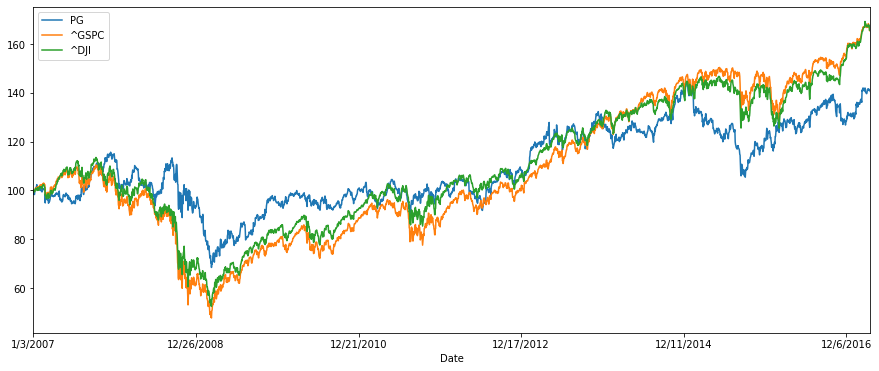

In [75]:
(data/data.iloc[0]*100).plot(figsize=(15,6))
plt.show

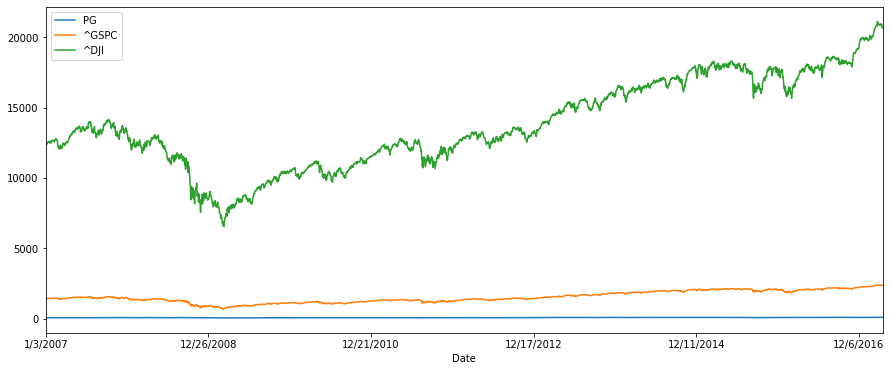

In [76]:
data.plot(figsize=(15,6))

### Calculating the Returns on portfolio Securities

In [77]:
Returns=(data/data.shift(1))-1
Returns.head()

,PG,^GSPC,^DJI
Date,,,
1/3/2007,NaN,NaN,NaN
1/4/2007,-0.007592,0.001228,0.000495
1/5/2007,-0.008587,-0.006085,-0.006625
1/8/2007,0.002205,0.002220,0.002055
1/9/2007,-0.002514,-0.000517,-0.000555


In [85]:
weights=np.array([0.5,0.25,0.25])

In [86]:
np.dot(Returns,weights)

array([        nan, -0.00336534, -0.00747086, ..., -0.00611072,
       -0.00070531, -0.00153112])

In [87]:
annual_returns=Returns.mean()*250
annual_returns

PG       0.048893
^GSPC    0.070342
^DJI     0.066991
dtype: float64

In [88]:
np.dot(annual_returns,weights)

0.058779457695317075

In [90]:
pfolio_1 =str(round (np.dot(annual_returns,weights), 5)*100) + ' %'
print (pfolio_1)

5.878 %
